In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from tkinter import filedialog, Tk
import os

# Disable root window
root = Tk()
root.withdraw()

''

In [168]:
# Ask the user to select a file
file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx")])
df = pd.read_excel(file_path)
df.head()

# Making output directory for later
output_dir = os.path.join(os.path.dirname(file_path), 'Summary')
os.makedirs(output_dir, exist_ok=True)

2024-06-24 21:21:50.110 python[74998:3152438] +[CATransaction synchronize] called within transaction
2024-06-24 21:21:50.153 python[74998:3152438] +[CATransaction synchronize] called within transaction
2024-06-24 21:21:50.295 python[74998:3152438] +[CATransaction synchronize] called within transaction
2024-06-24 21:21:51.811 python[74998:3152438] +[CATransaction synchronize] called within transaction


# Creating a new matrix with just relevant data

1. startDate (28th column)
2. startTime (26th column)
3. day time (calculated from startTime)
4. start (12th column)
5. end (13th column)
6. animalNum (2nd column)

In [169]:
vprawData = pd.DataFrame(np.zeros((len(df), 15)))

    # Column 1 = startDate
startDate = df.iloc[:, 27]
vprawData[0] = startDate

startTime = df.iloc[:, 28]

startTime = pd.to_datetime(startTime, format='%H:%M:%S').dt.time
def total_minutes_elapsed(time):
    base_time = datetime.strptime('18:00:00', '%H:%M:%S').time()
    delta = timedelta(hours=time.hour, minutes=time.minute, seconds=time.second) - timedelta(hours=base_time.hour, minutes=base_time.minute, seconds=base_time.second)
    return delta.seconds // 60
vprawData[1] = startTime.apply(total_minutes_elapsed)

# assuming that data collection starts at 6pm precisely
# NightIdx1 = vprawData.iloc[:, 1] < 900 # 9am
# NightIdx2 = vprawData.iloc[:, 1] > 2300 # 11pm

daynightIdx = (vprawData.iloc[:,1] > 300) & (vprawData.iloc[:,1] < 900) # midnight labeled with True
vprawData[2] = daynightIdx
    
#     # Column 4 and 5 start and end
vprawData.iloc[:, 3:5] = df.iloc[:, 14:16].to_numpy()
    
#     # Column 6
animalNum = df.iloc[:, 1].str.extract(r'z(\d+)').astype(float).to_numpy().flatten()
vprawData.iloc[:, 5] = animalNum
    
#     # Column 7-15
vprawData.iloc[:, 6:15] = df.iloc[:, 18:27].to_numpy()

vprawData = vprawData.rename(columns={0: 'startDate',
                                      1: 'startTime',
                                      2: 'night',
                                      3: 'start',
                                      4: 'end',
                                      5: 'animalNum',
                                      6: 'freezeCount',
                                      7: 'freezeDuration',
                                      8: 'midCount',
                                      9: 'midDuration',
                                      10: 'burstCount',
                                      11: 'burstDuration',
                                      12: 'zeroCount',
                                      13: 'zeroDuration',
                                      14: 'activityIntegral'})

vprawData

,startDate,startTime,night,start,end,animalNum,freezeCount,freezeDuration,midCount,midDuration,burstCount,burstDuration,zeroCount,zeroDuration,activityIntegral
0,2023-10-04,0,False,0.0,60.000,1.0,1.0,60.036,0.0,0.000,0.0,0.000,NaN,NaN,NaN
1,2023-10-04,0,False,0.0,60.000,2.0,1.0,60.036,0.0,0.000,0.0,0.000,NaN,NaN,NaN
2,2023-10-04,0,False,0.0,60.000,3.0,2.0,59.933,1.0,0.102,0.0,0.000,NaN,NaN,NaN
3,2023-10-04,0,False,0.0,60.000,4.0,1.0,60.036,0.0,0.000,0.0,0.000,NaN,NaN,NaN
4,2023-10-04,0,False,0.0,60.000,5.0,1.0,60.036,0.0,0.000,0.0,0.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34555,2023-10-05,1439,False,86340.0,86400.007,20.0,0.0,59.998,0.0,0.000,0.0,0.000,NaN,NaN,NaN
34556,2023-10-05,1439,False,86340.0,86400.007,21.0,3.0,59.765,3.0,0.233,0.0,0.000,NaN,NaN,NaN
34557,2023-10-05,1439,False,86340.0,86400.007,22.0,0.0,59.998,0.0,0.000,0.0,0.000,NaN,NaN,NaN
34558,2023-10-05,1439,False,86340.0,86400.007,23.0,8.0,59.195,9.0,0.734,1.0,0.069,NaN,NaN,NaN


In [170]:
freezeCount = vprawData.iloc[:, 6]        # Adding .iloc for integer-location based indexing
freezeDuration = vprawData.iloc[:, 7]     # Adding .iloc for integer-location based indexing
midCount = vprawData.iloc[:, 8]           # Adding .iloc for integer-location based indexing
midDuration = vprawData.iloc[:, 9]        # Adding .iloc for integer-location based indexing
burstCount = vprawData.iloc[:, 10]        # Adding .iloc for integer-location based indexing
burstDuration = vprawData.iloc[:, 11]     # Adding .iloc for integer-location based indexing
zeroCount = vprawData.iloc[:, 12]         # Adding .iloc for integer-location based indexing
zeroDuration = vprawData.iloc[:, 13]      # Adding .iloc for integer-location based indexing
activityIntegral = vprawData.iloc[:, 14]  # Adding .iloc for integer-location based indexing

# Cleaning up recording errors

- if start has decimal, delete the row
- if end has decimal, delete the row
- if start and end values are the same, delete the row
- if start < end, delete the row

In [171]:
before_filter = len(vprawData)
vprawData = vprawData[(vprawData['start'] == vprawData['start'].round()) &
                      (vprawData['end'] == vprawData['end'].round()) &
                      (vprawData['start'] != vprawData['end'])]
after_filter = len(vprawData)

print(f'{before_filter}, {after_filter}. {before_filter - after_filter} rows removed!')

34560, 34536. 24 rows removed!


# Sorting data

- sorting by animal ID and startTime
- moving animalnum to column 0

In [172]:
needTotalBoxBool = int(input("Do you want TotalBoxPlots (1 is yes): "))
# rowBool = int(input("How many conditions are we comparing? "))
# expMode = int(input("Experiment Mode? (0 is single well, 1 is plate, 2 is Row 1.3 vs 2.4, 3 is Row 1 vs 2 and 3 vs 4, and 4 is Row 1 vs 2.3.4): "))
# moviesBool = int(input("Do you want movies? (1 for yes): "))
# rowLabels = [
#     input("Row 1 condition: "),
#     input("Row 2 condition: "),
#     input("Row 3 condition: "),
#     input("Row 4 condition: ")
# ]
treatmentBool = int(input("Do you want to remove any timepoints due to treatment? (1 is yes): "))
removeTransBool = int(input("Do you want to remove the Day/Night transition minute? (1 is yes): "))
binWidth = int(input("Set time window Bin width (min): "))
sleepwakeMatrixBool = int(input("Do you want a sleep/wake matrix? (1 is yes): "))
sleepDurationBool = int(input("Do you want a sleep bout duration matrix? (1 is yes): "))
removeBool = int(input("Do you want to exclude any wells? (1 is yes): "))

In [173]:
# Remove measurements taken during heatshock or adding drugs
if treatmentBool:
    startTreat = int(input("Treatment Started: "))
    endTreat = int(input("Treatment Ended: "))
    vprawData.loc[startTreat:endTreat*num_animals, 'freezeCount':'activityIntegral'] = np.nan

# Exclude the minute bin when the light turns on and off
if removeTransBool:
    vprawData.loc[vprawData['startTime'] == 300, 'freezeCount':'activityIntegral'] = np.nan
    vprawData.loc[vprawData['startTime'] == 900, 'freezeCount':'activityIntegral'] = np.nan

# Remove any fish that didn't survive the experiment
if removeBool:
    deleteWells = input("Enter space-separated numbers of wells to exclude: ")
    deleteWells = list(map(int, deleteWells.split()))
    for well in deleteWells:
        vprawData.loc[vprawData['animalNum'] == well, 'freezeCount':'activityIntegral'] = np.nan

In [174]:
vprawData.sort_values(['animalNum', 'startTime'], ignore_index=True, inplace=True)

vprawData.insert(0, 'animalNum', vprawData.pop('animalNum'))

/var/folders/jj/d6gvws214k5820_262znl8980000gp/T/ipykernel_74998/249719067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vprawData.sort_values(['animalNum', 'startTime'], ignore_index=True, inplace=True)


In [175]:
num_animals = int(vprawData['animalNum'].max())
noofBins = len(vprawData[vprawData['animalNum'] == 1]) // binWidth
vpMeasure = np.zeros((noofBins, 3, num_animals))

for animalIdx in range(1, num_animals + 1):

    animal_data = vprawData[vprawData['animalNum'] == animalIdx]

    noofBins = len(animal_data) // binWidth

    for binIdx in range(noofBins):
        binRange = slice(binIdx * binWidth, (binIdx + 1) * binWidth)
        vpMeasure[binIdx, 0, animalIdx - 1] = animal_data.iloc[binRange]['startTime'].iloc[0]
        vpMeasure[binIdx, 1, animalIdx - 1] = animal_data.iloc[binRange]['midDuration'].sum()
        vpMeasure[binIdx, 2, animalIdx - 1] = (animal_data.iloc[binRange]['midDuration'] == 0).sum()
        # USE THIS FOR TROUBLESHOOTING: print(f'animal is {animalIdx} and bin# is {binIdx} // starttime {vpMeasure[binIdx, 0, animalIdx - 1]} // midDuration sum {vpMeasure[binIdx, 1, animalIdx - 1]} // # of zeros {vpMeasure[binIdx, 2, animalIdx - 1]}')

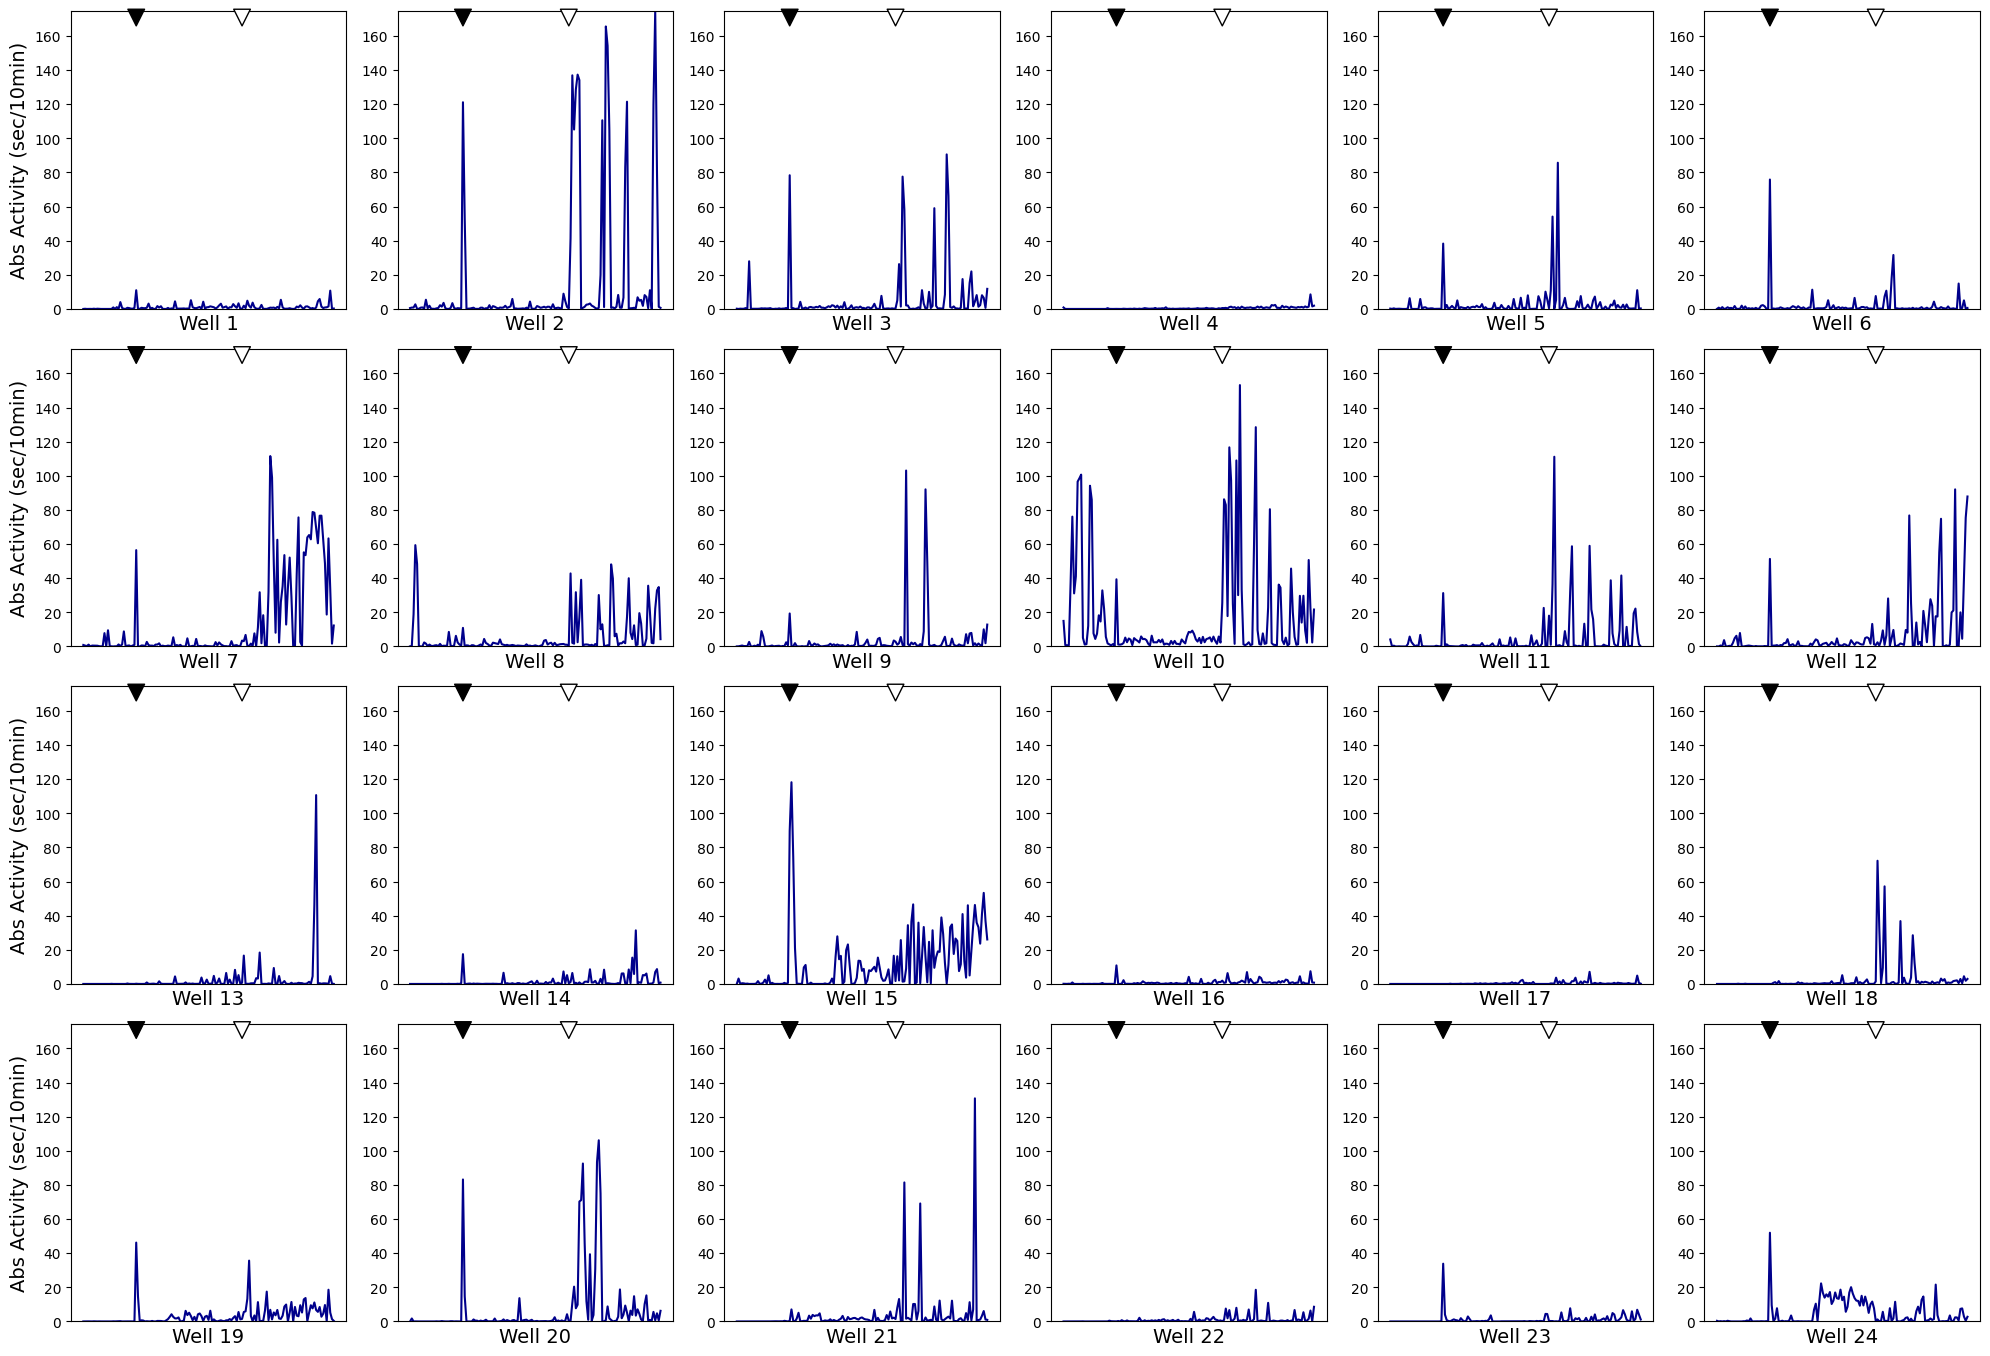

In [196]:
y_min = np.min(vpMeasure[:, 1, :])
y_max = np.max(vpMeasure[:, 1, :])

if needTotalBoxBool:
    fig, axs = plt.subplots(4, 6, figsize=(20, 15))
    fig.suptitle('', fontsize=16) # Include title if necessary

    axs = axs.flatten()

    for i in range(num_animals):
        axs[i].plot(vpMeasure[:, 0, i], vpMeasure[:, 1, i], color='darkblue')
        axs[i].grid(False)
        
        axs[i].set_ylabel('')
        if i % 6 == 0:
            axs[i].set_ylabel('Abs Activity (sec/10min)', fontsize=14)

        axs[i].set_ylim(y_min, y_max)
        axs[i].set_xticks([])
        axs[i].set_xlabel(f'Well {i + 1}', fontsize=14)

        axs[i].annotate('', xy=(300, y_max - (y_max - y_min)*0.05), xytext=(300, y_max),
                        arrowprops=dict(facecolor='black', shrink=0, width=3, headwidth=12))
        
        axs[i].annotate('', xy=(900, y_max - (y_max - y_min)*0.05), xytext=(900, y_max),
                        arrowprops=dict(facecolor='white', edgecolor='black', shrink=0, width=3, headwidth=12))

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(os.path.join(output_dir, 'activity_plots_all_animals.png'))
    plt.show()

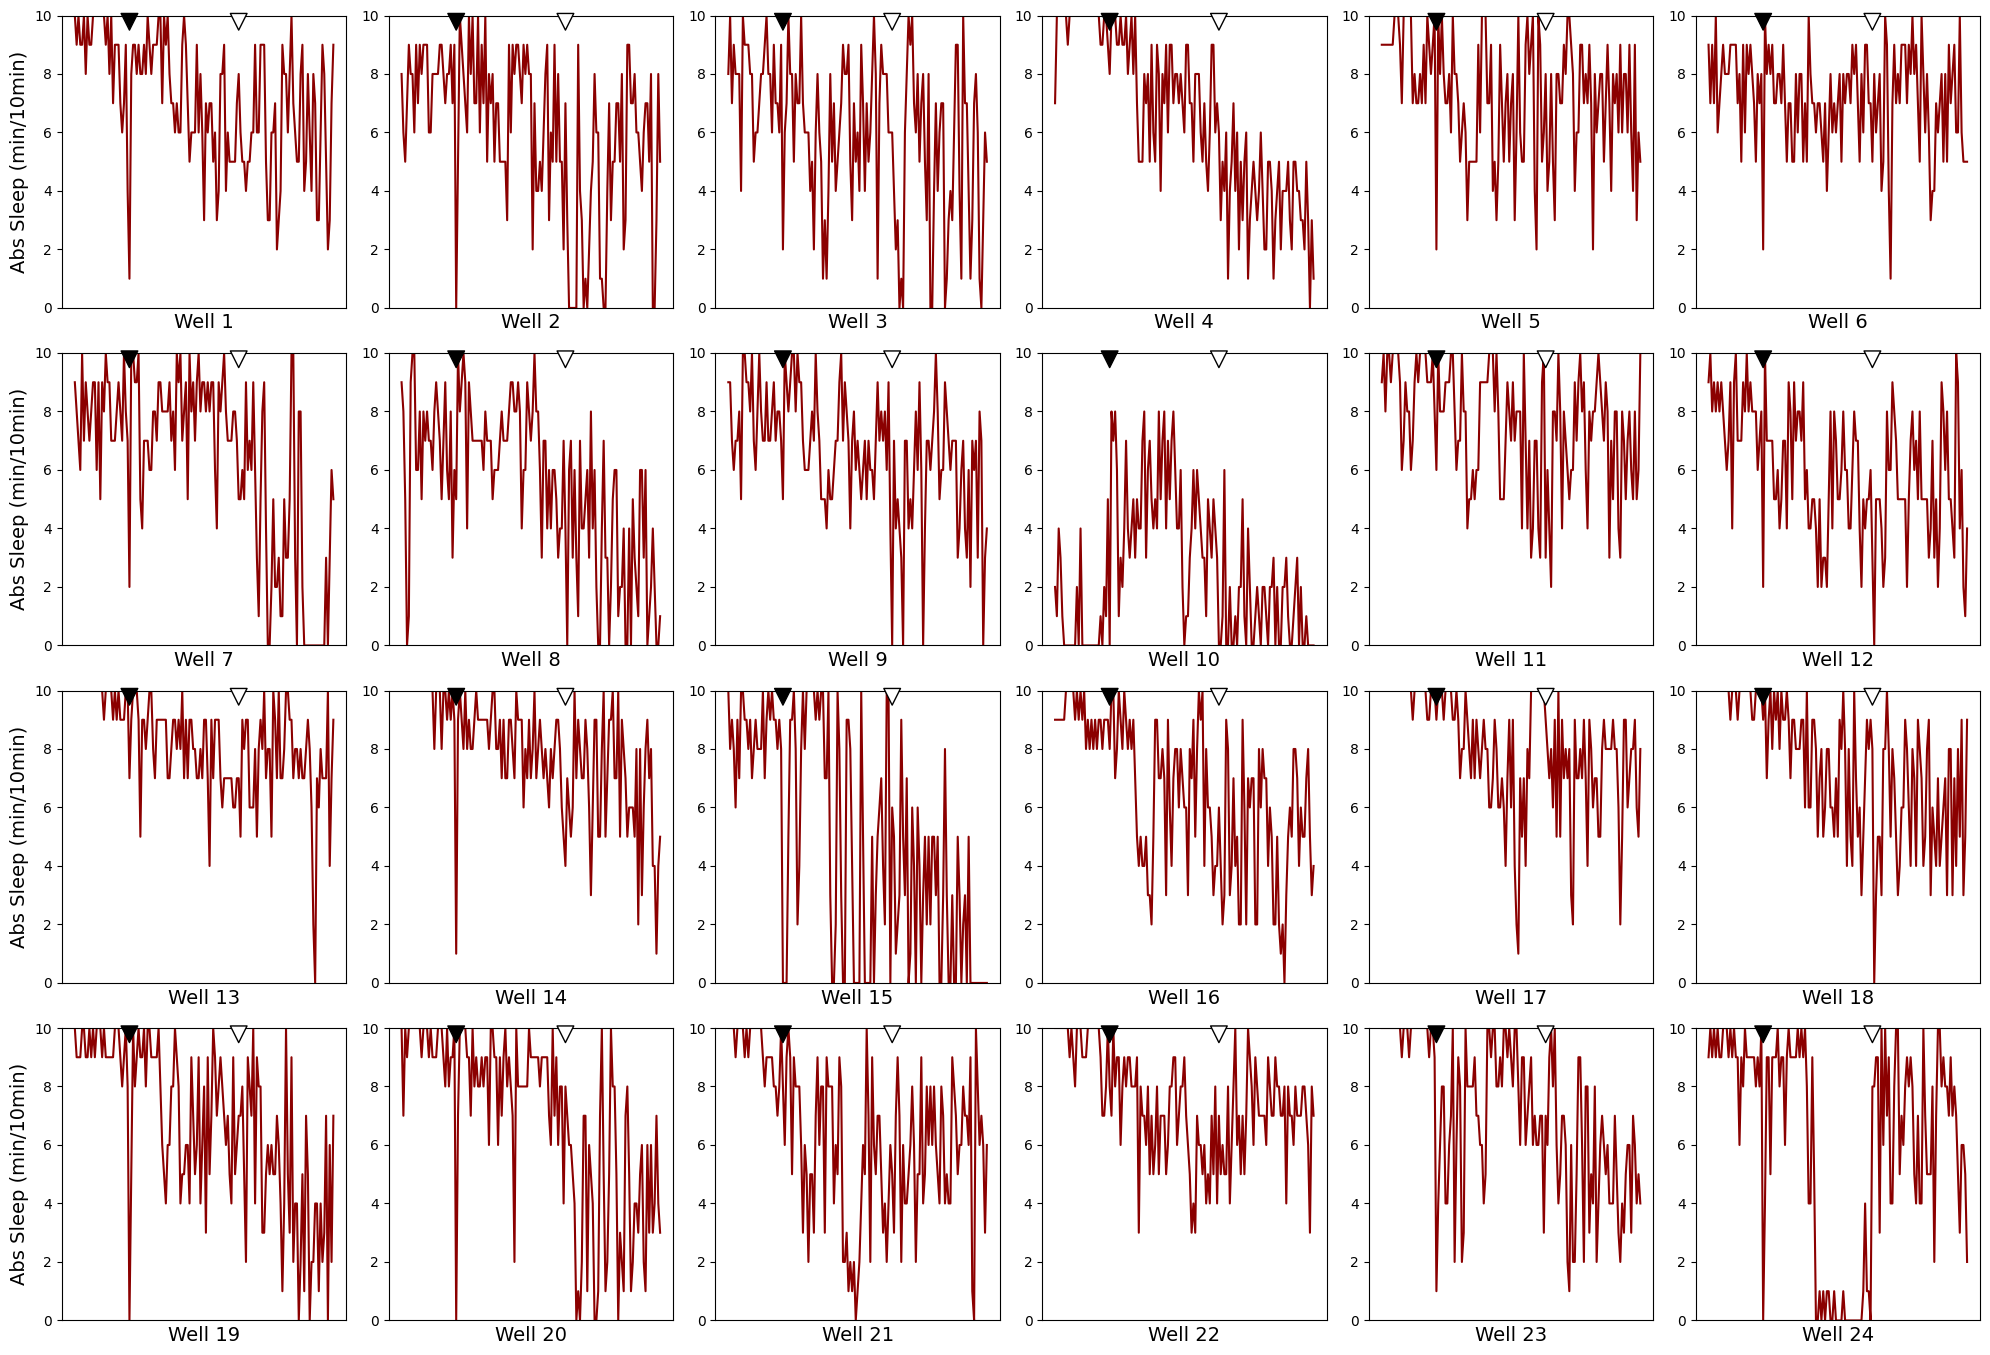

In [195]:
y_min = np.min(vpMeasure[:, 2, :])
y_max = np.max(vpMeasure[:, 2, :])

if sleepwakeMatrixBool:
   fig, axs = plt.subplots(4, 6, figsize=(20, 15))
   fig.suptitle('', fontsize=16) # Include title if necessary

   axs = axs.flatten()

   for i in range(num_animals):
      axs[i].plot(vpMeasure[:, 0, i], vpMeasure[:, 2, i], color='darkred')
      axs[i].grid(False)
        
      axs[i].set_ylabel('')
      if i % 6 == 0:
         axs[i].set_ylabel('Abs Sleep (min/10min)', fontsize=14)

      axs[i].set_ylim(y_min, y_max)
      axs[i].set_xticks([])
      axs[i].set_xlabel(f'Well {i + 1}', fontsize=14)

      axs[i].annotate('', xy=(300, y_max - (y_max - y_min)*0.05), xytext=(300, y_max),
                        arrowprops=dict(facecolor='black', shrink=0, width=3, headwidth=12))
        
      axs[i].annotate('', xy=(900, y_max - (y_max - y_min)*0.05), xytext=(900, y_max),
                        arrowprops=dict(facecolor='white', edgecolor='black', shrink=0, width=3, headwidth=12))

   plt.tight_layout(rect=[0, 0.03, 1, 0.95])
   plt.savefig(os.path.join(output_dir, 'sleep_plots_all_animals.png'))
   plt.show()

# Measuring # and duration of sleep bouts (use vpSleep)

A sleep bout is defined by a continuous "freeze duration" (fredur) with 60 seconds and no "freeze counts" (frect) interrupting it.

(60 second window, freezecount greater than 60 = sleep. count bouts)

Step 1: Count the number of sleep bouts each fish has

Step 2: Calculate the total and average duration of these sleep bouts

Step 3: Graph it




USE freezecount and freezeduration (freezeduation is continuous, freezecount stops and starts everytime it starts)

In [197]:
noofMin = len(vprawData[vprawData['animalNum'] == 1])
vpSleepBout = np.zeros((noofMin, 4, num_animals))

for animalIdx in range(num_animals):

    animal_data = vprawData[vprawData['animalNum'] == animalIdx+1]

    for binIdx in range(noofMin):
        vpSleepBout[binIdx, 0, animalIdx - 1] = animal_data.iloc[binIdx]['startTime']
        vpSleepBout[binIdx, 1, animalIdx - 1] = animal_data.iloc[binIdx]['freezeCount']
        vpSleepBout[binIdx, 2, animalIdx - 1] = animal_data.iloc[binIdx]['freezeDuration']

        # Defining "sleep bout"
        # 1 if freezeDuration.round() = 60 & freezeCount = 0
        # else 0

        if animal_data.iloc[binIdx]['freezeDuration'].round() == 60 and animal_data.iloc[binIdx]['freezeCount'] == 0:
            vpSleepBout[binIdx, 3, animalIdx - 1] = 1
        else:
            vpSleepBout[binIdx, 3, animalIdx - 1] = 0

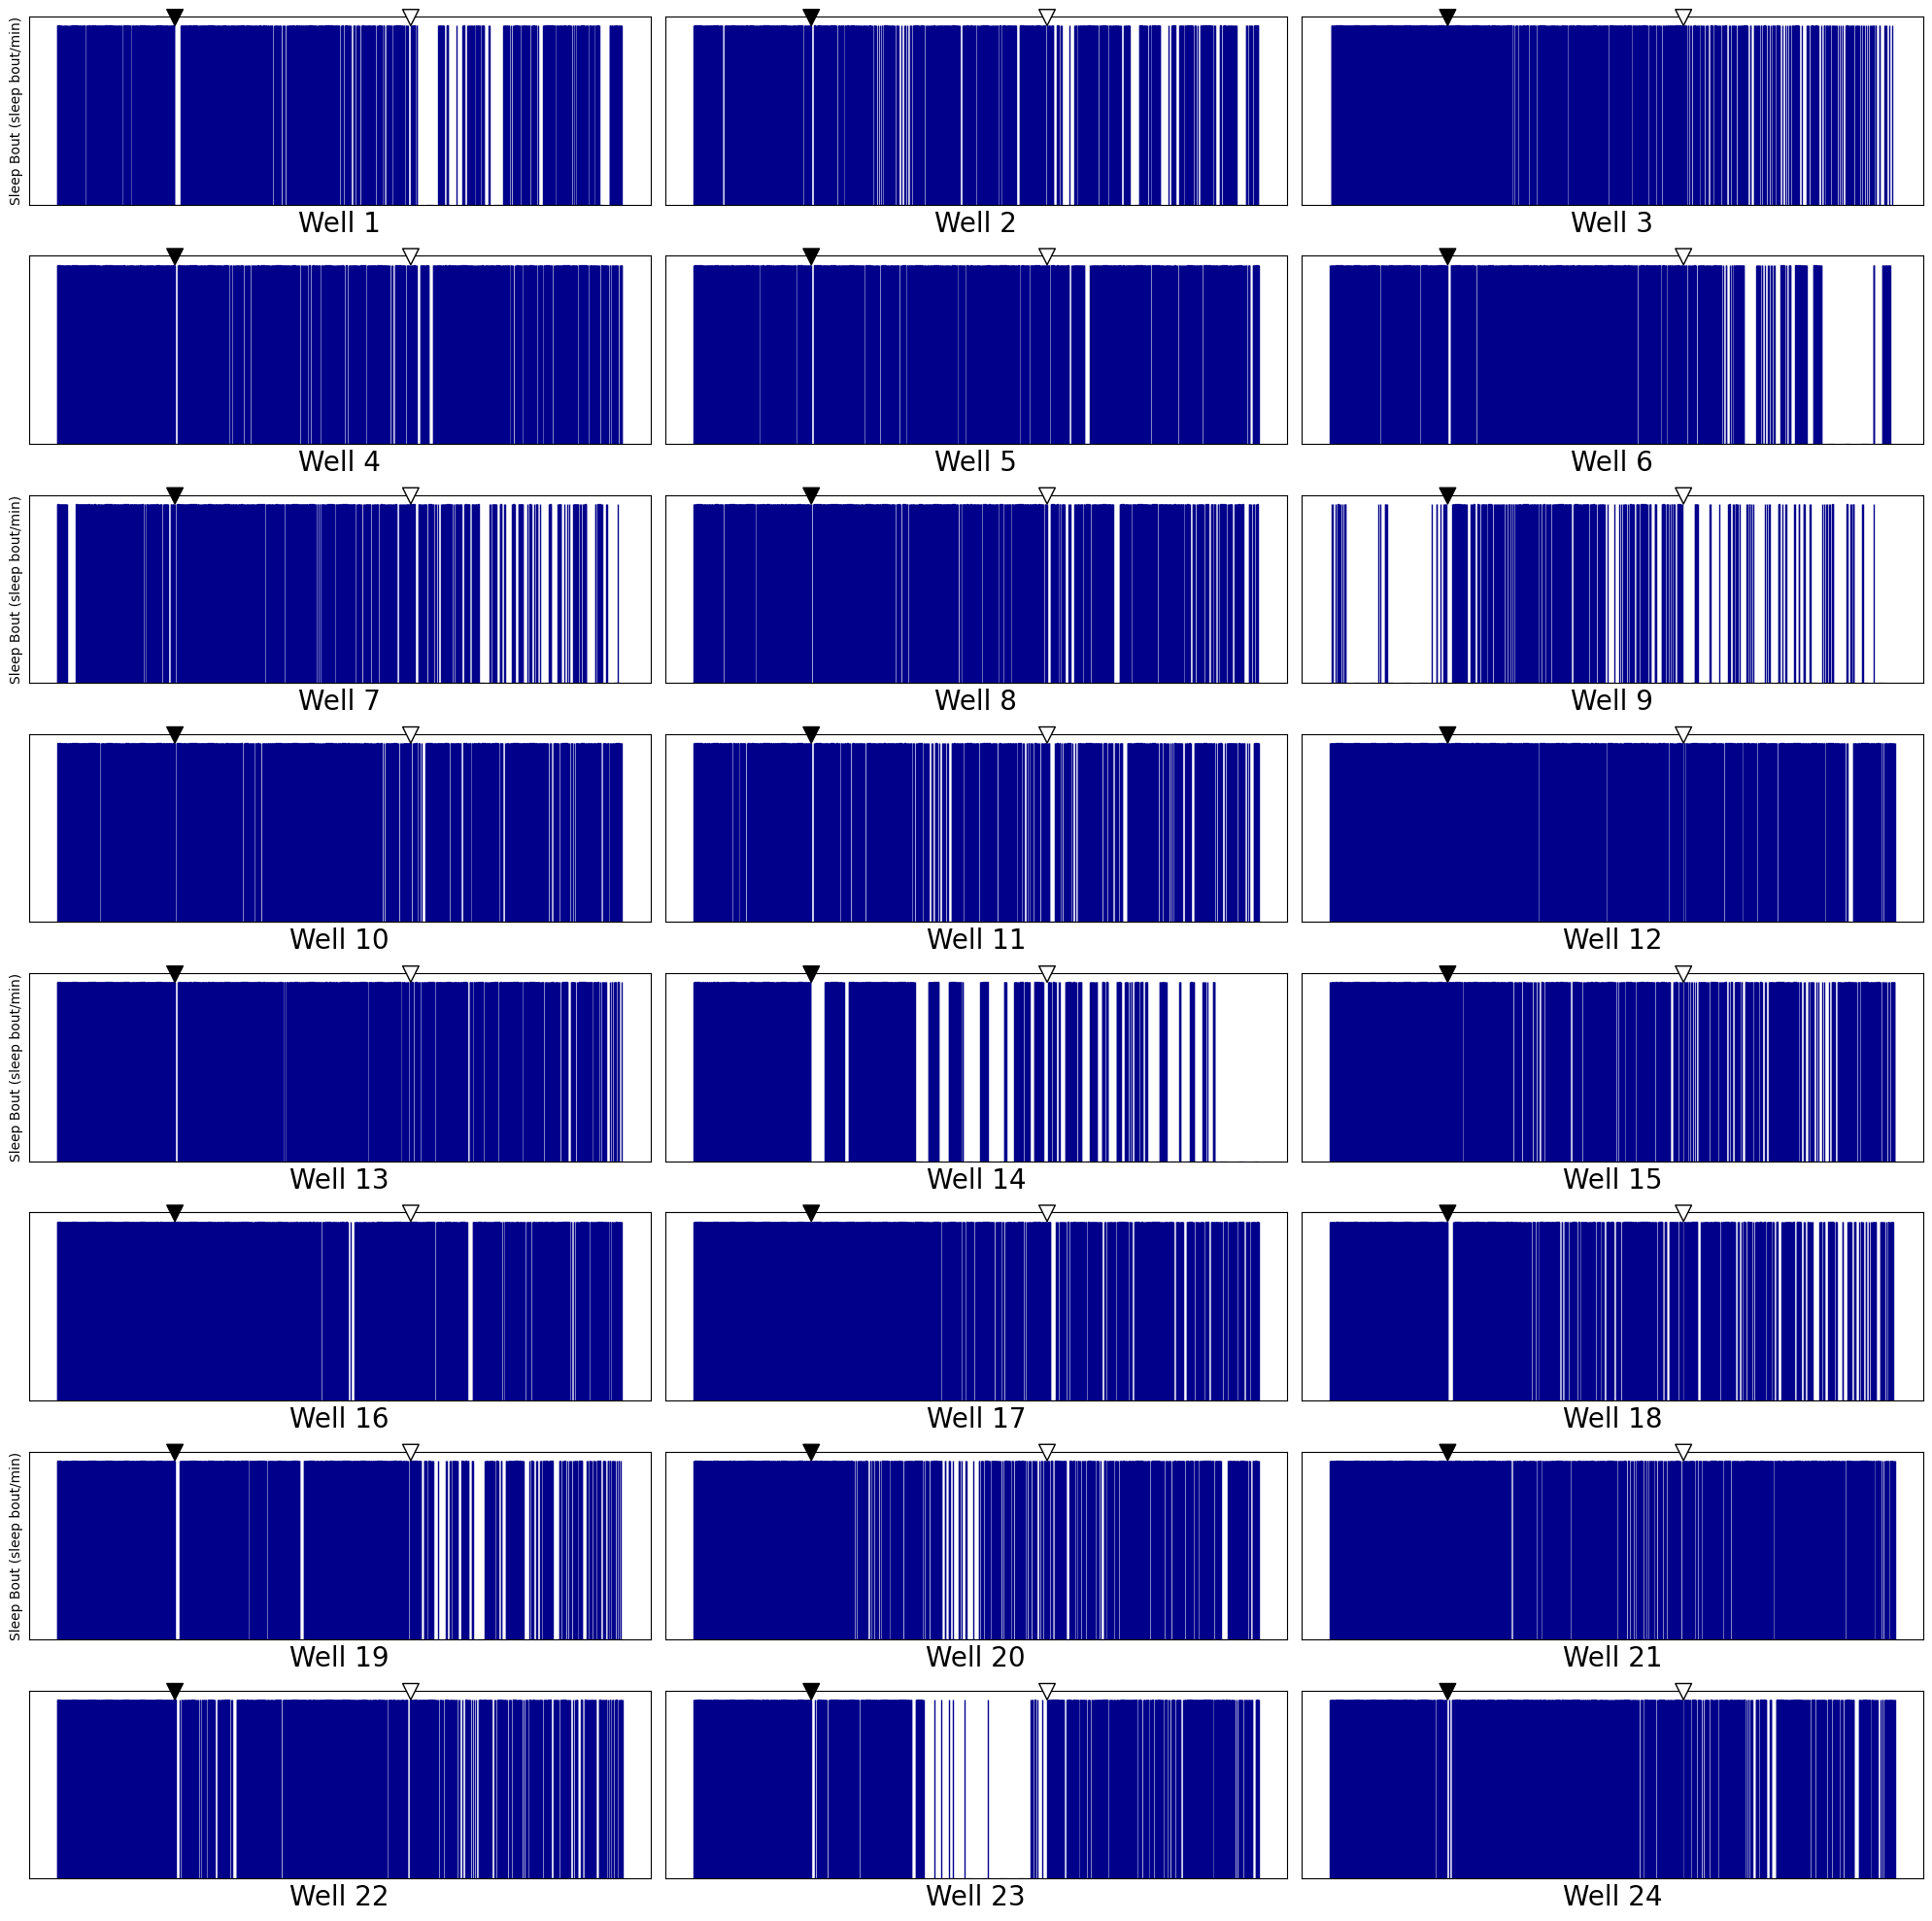

In [218]:
y_min = 0
y_max = 1

if sleepwakeMatrixBool:
   fig, axs = plt.subplots(8, 3, figsize=(20, 20))
   fig.suptitle('', fontsize=16)

   axs = axs.flatten()

   for i in range(num_animals):
      axs[i].bar(np.arange(len(vpSleepBout[:, 0, i])), 
            vpSleepBout[:, 3, i], 
            color='darkblue', width=0.2, edgecolor='darkblue')
      
      axs[i].grid(False)
        
      axs[i].set_ylabel('')
      if i % 6 == 0:
         axs[i].set_ylabel('Sleep Bout (sleep bout/min)')

      axs[i].set_yticks([])
      axs[i].set_xticks([])
      axs[i].set_xlabel(f'Well {i + 1}', fontsize=16)

      axs[i].annotate('', xy=(300, y_max), xytext=(300, y_max+(y_max - y_min)*0.025),
                        arrowprops=dict(facecolor='black', shrink=0, width=3, headwidth=12))
        
      axs[i].annotate('', xy=(900, y_max), xytext=(900, y_max+(y_max - y_min)*0.025),
                        arrowprops=dict(facecolor='white', edgecolor='black', shrink=0, width=3, headwidth=12))

   plt.tight_layout(rect=[0, 0, 1, 1])
   plt.savefig(os.path.join(output_dir, 'sleep_bouts_all_animals.png'))
   plt.show()

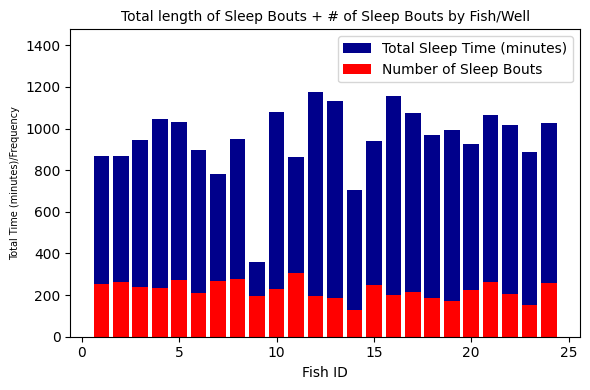

In [228]:
sleep_bout_counts = []

for animalIdx in range(num_animals):
    sleep_bouts_count = 0
    total_sleep_time = 0
    is_sleep_bout = False
    current_bout_start = 0
    
    for binIdx in range(len(vpSleepBout)):
        if vpSleepBout[binIdx, 3, animalIdx] == 1:
            if is_sleep_bout == False:
                sleep_bouts_count += 1
                is_sleep_bout = True
            total_sleep_time += 1
        else:
            if is_sleep_bout == True:
                is_sleep_bout = False
    
    sleep_bout_counts.append({
        'Fish ID': animalIdx + 1,
        'Sleep Bouts': sleep_bouts_count,
        'Total Sleep Time (min)': total_sleep_time
    })

sleep_bouts_df = pd.DataFrame(sleep_bout_counts)

y_min = 0
y_max = np.max(sleep_bouts_df['Total Sleep Time (min)'])

plt.figure(figsize=(6, 4))
plt.bar(sleep_bouts_df['Fish ID'], sleep_bouts_df['Total Sleep Time (min)'], color='darkblue')
plt.bar(sleep_bouts_df['Fish ID'], sleep_bouts_df['Sleep Bouts'], color='red')
plt.ylim(y_min, y_max + 300)

plt.xlabel('Fish ID')
plt.ylabel('Total Time (minutes)/Frequency', fontsize=7)
plt.title('Total length of Sleep Bouts + # of Sleep Bouts by Fish/Well', fontsize=10)
plt.legend(['Total Sleep Time (minutes)', 'Number of Sleep Bouts'])

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'sleep_bouts_statistics_all_animals.png'))
plt.show()


# Overlay of abs sleep graphs onto each other

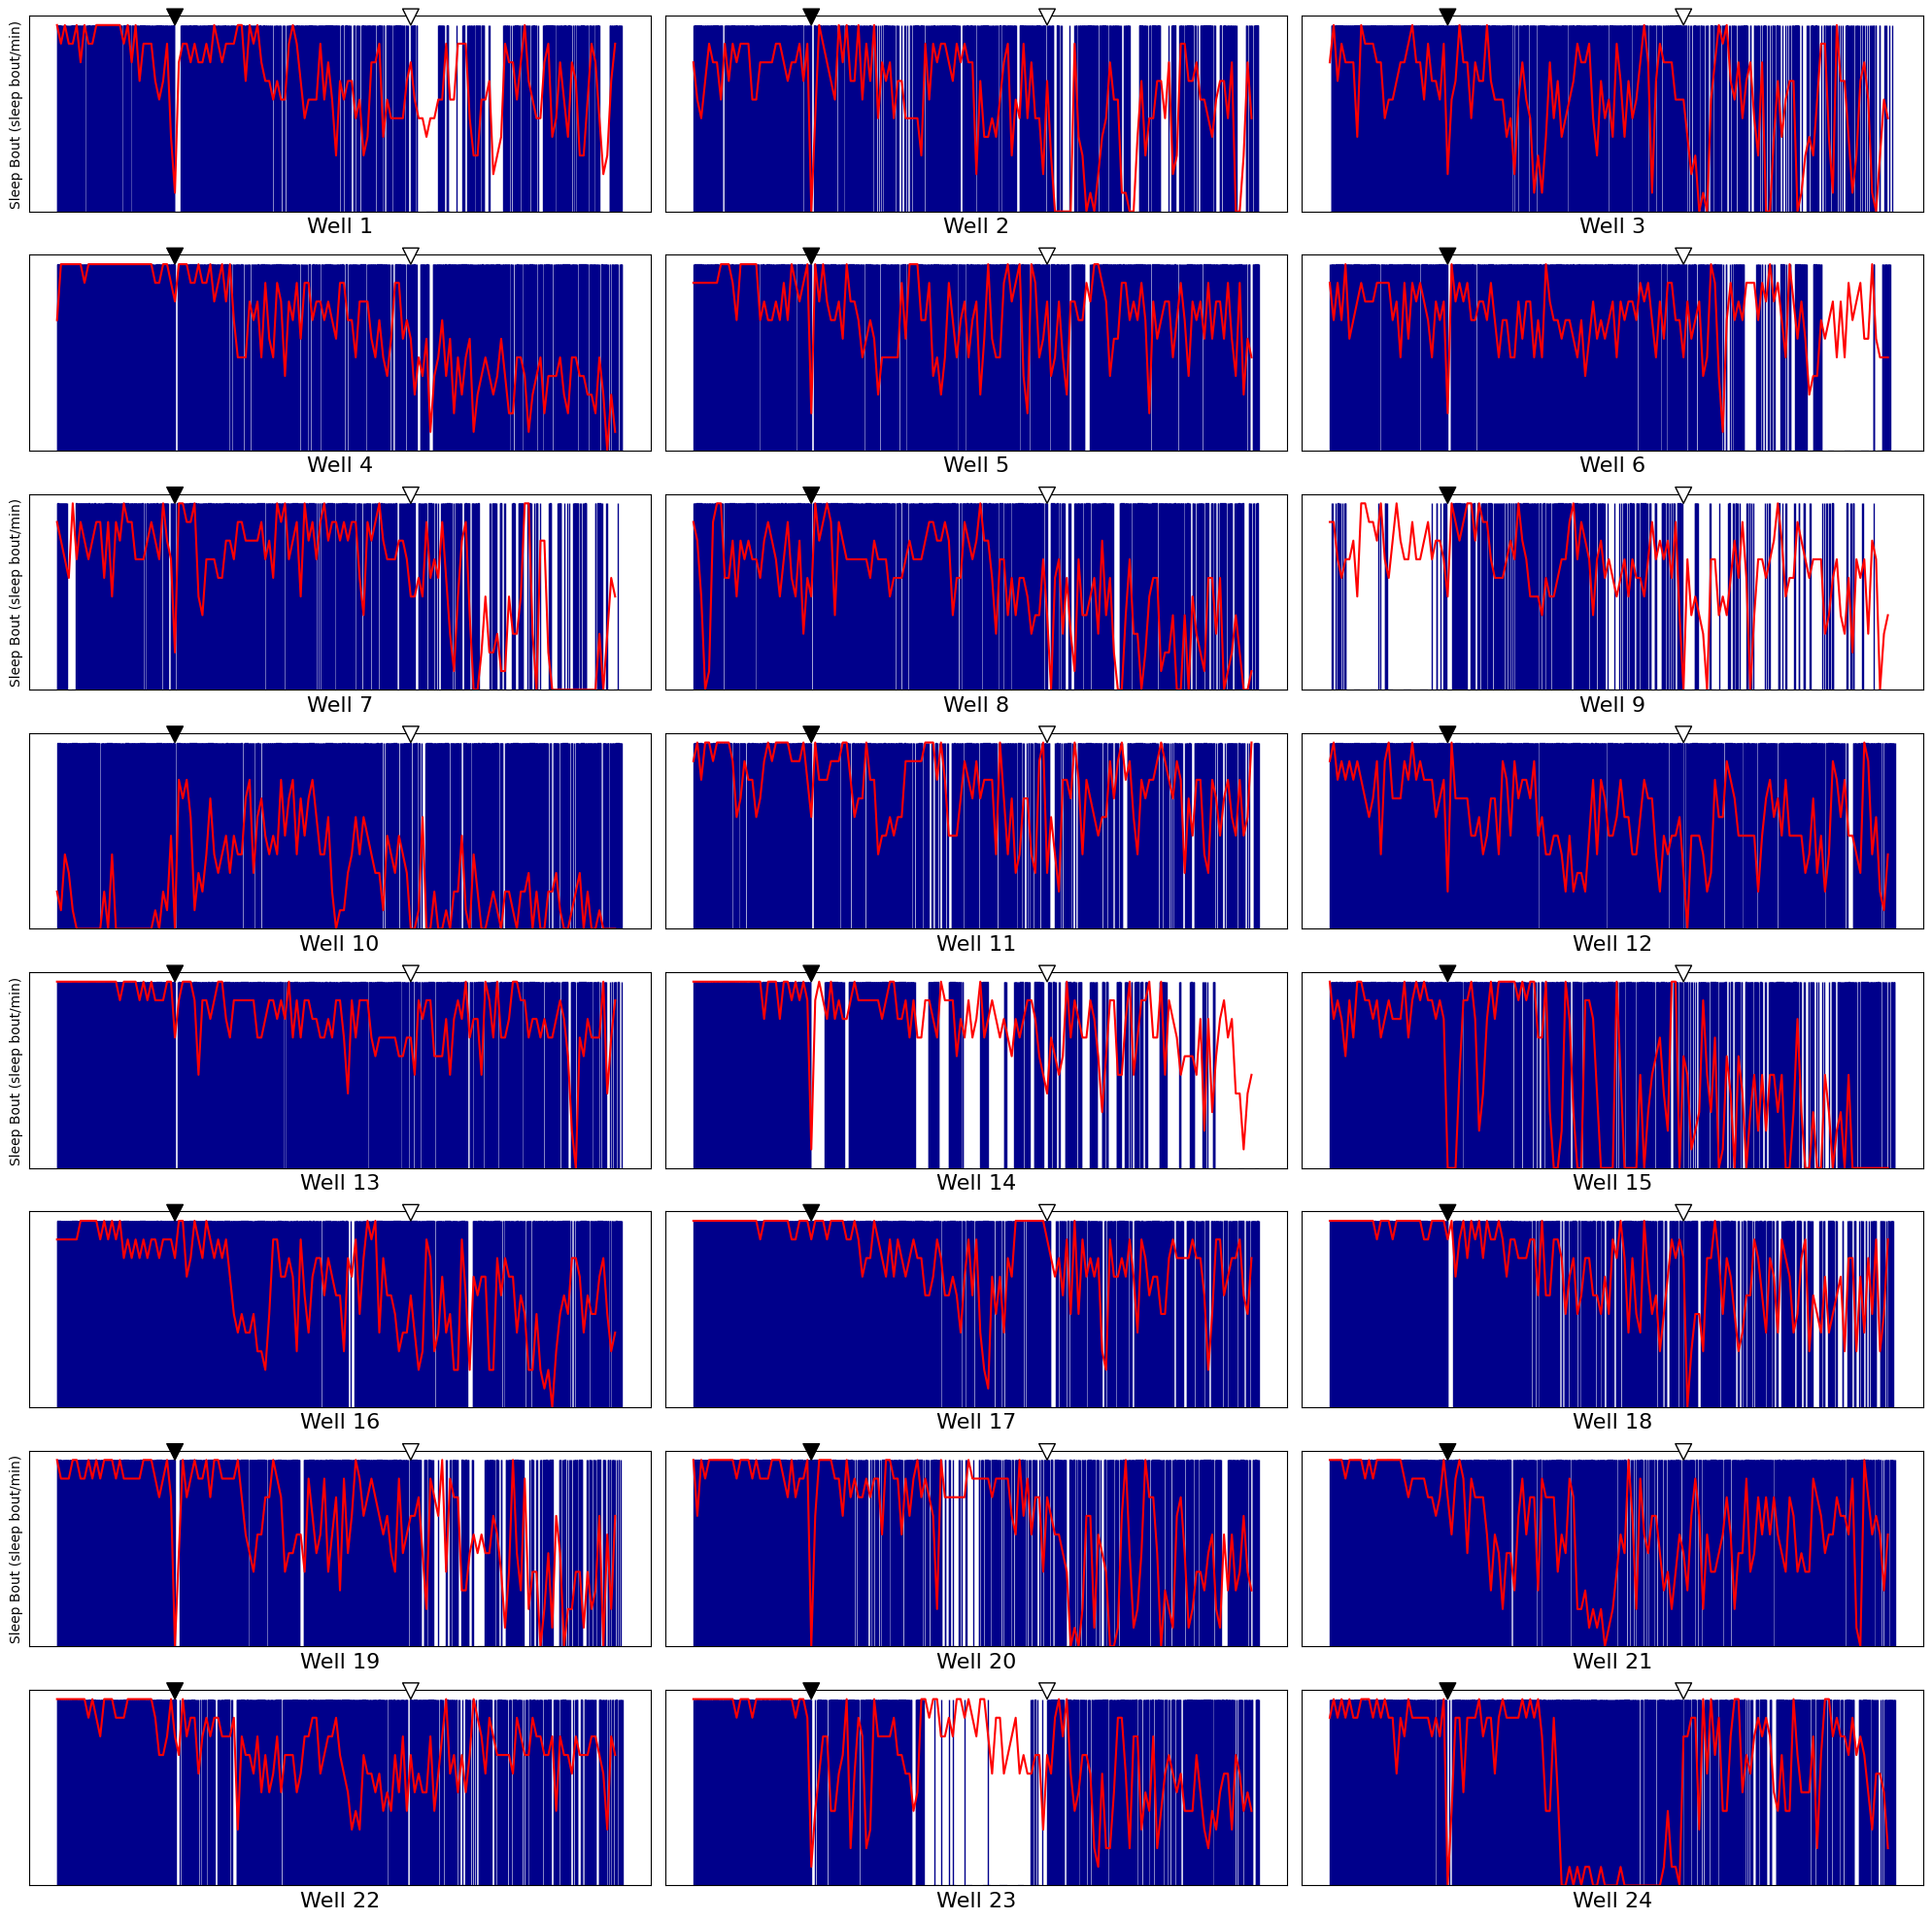

In [230]:
y_min = 0
y_max = 1

if sleepwakeMatrixBool:
   fig, axs = plt.subplots(8, 3, figsize=(20, 20))
   fig.suptitle('', fontsize=16)

   axs = axs.flatten()

   for i in range(num_animals):
      axs[i].bar(np.arange(len(vpSleepBout[:, 0, i])), 
            vpSleepBout[:, 3, i], 
            color='darkblue', width=0.2, edgecolor='darkblue')
      
      axs[i].plot(vpMeasure[:, 0, i], vpMeasure[:, 2, i] / 10, color='red', label='Abs Sleep (min/10min)')

      axs[i].grid(False)
        
      axs[i].set_ylabel('')
      if i % 6 == 0:
         axs[i].set_ylabel('Sleep Bout (sleep bout/min)')

      axs[i].set_yticks([])
      axs[i].set_xticks([])
      axs[i].set_xlabel(f'Well {i + 1}', fontsize=16)

      axs[i].annotate('', xy=(300, y_max), xytext=(300, y_max+(y_max - y_min)*0.025),
                        arrowprops=dict(facecolor='black', shrink=0, width=3, headwidth=12))
        
      axs[i].annotate('', xy=(900, y_max), xytext=(900, y_max+(y_max - y_min)*0.025),
                        arrowprops=dict(facecolor='white', edgecolor='black', shrink=0, width=3, headwidth=12))

   plt.tight_layout(rect=[0, 0, 1, 1])
   plt.savefig(os.path.join(output_dir, 'sleep_plots_overlayed_all_animals.png'))
   plt.show()

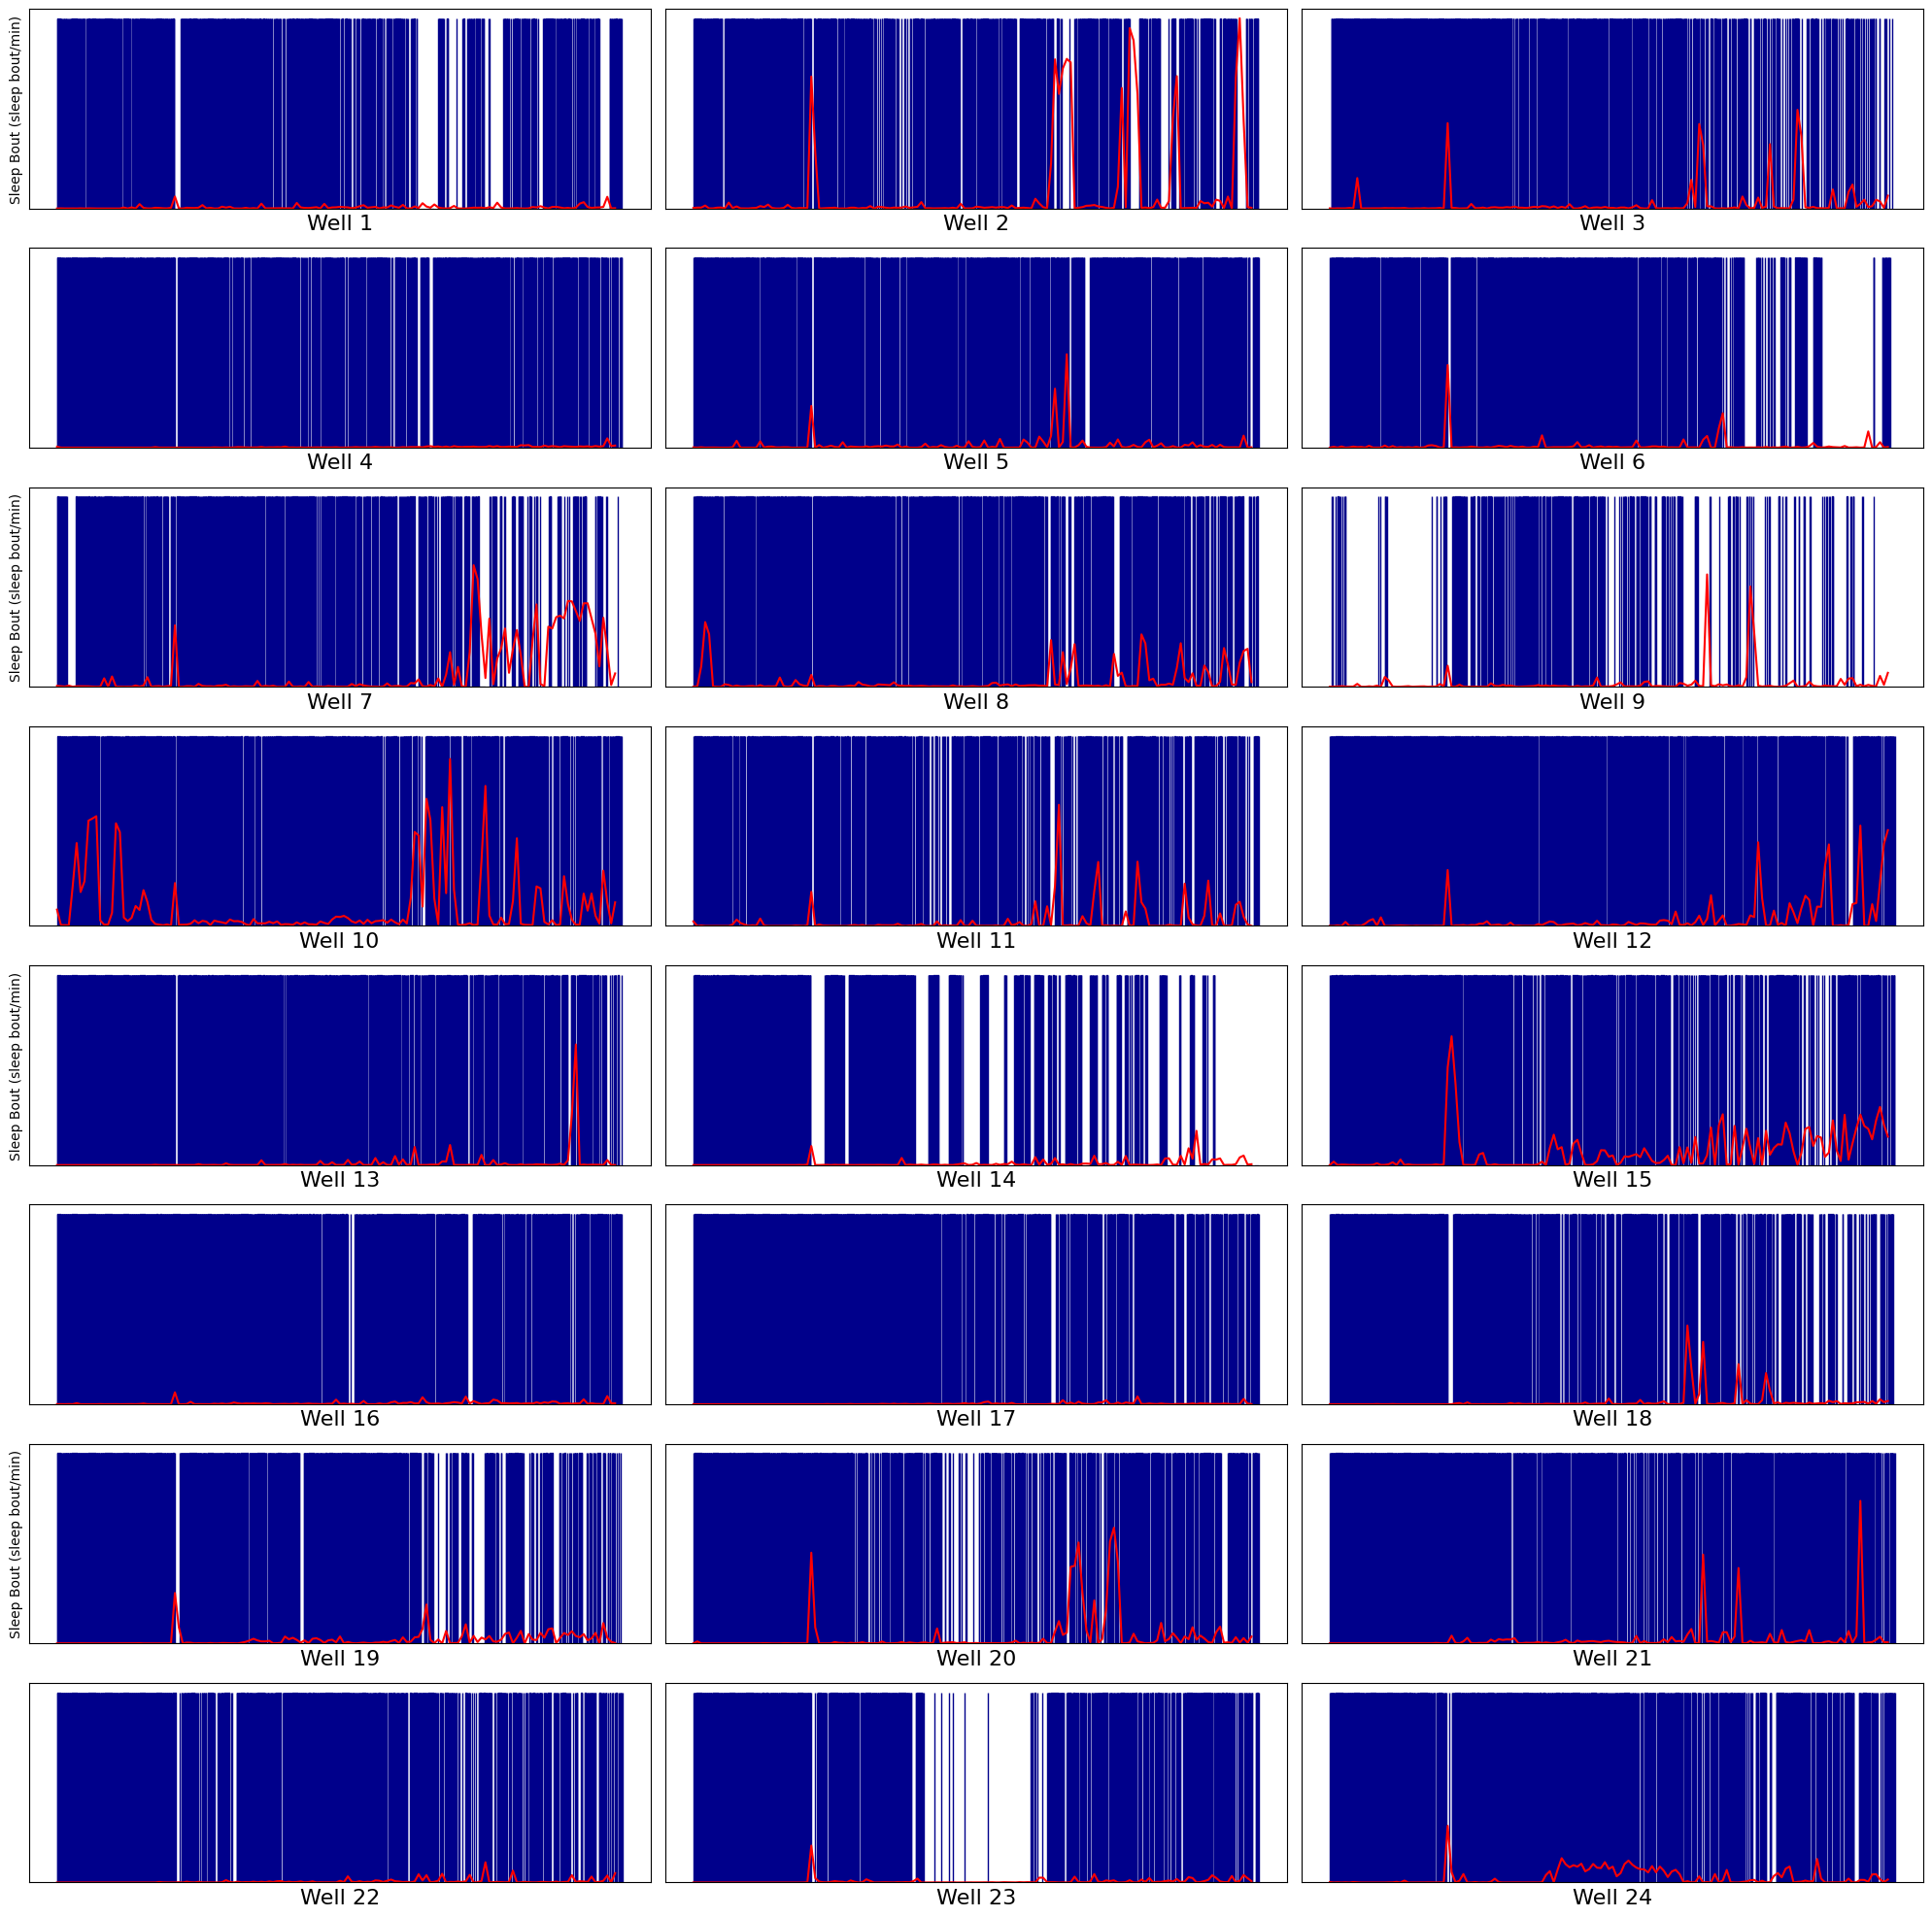

In [233]:
y_min = 0
y_max = np.max(vpMeasure[:, 1, :])

if sleepwakeMatrixBool:
   fig, axs = plt.subplots(8, 3, figsize=(20, 20))
   fig.suptitle('', fontsize=16)

   axs = axs.flatten()

   for i in range(num_animals):
      axs[i].bar(np.arange(len(vpSleepBout[:, 0, i])), 
            vpSleepBout[:, 3, i], 
            color='darkblue', width=0.2, edgecolor='darkblue')
      
      axs[i].plot(vpMeasure[:, 0, i], vpMeasure[:, 1, i] / y_max, color='red')

      axs[i].grid(False)
        
      axs[i].set_ylabel('')
      if i % 6 == 0:
         axs[i].set_ylabel('Sleep Bout (sleep bout/min)')

      axs[i].set_yticks([])
      axs[i].set_xticks([])
      axs[i].set_xlabel(f'Well {i + 1}', fontsize=16)

      axs[i].annotate('', xy=(300, y_max), xytext=(300, y_max+(y_max - y_min)*0.025),
                        arrowprops=dict(facecolor='black', shrink=0, width=3, headwidth=12))
        
      axs[i].annotate('', xy=(900, y_max), xytext=(900, y_max+(y_max - y_min)*0.025),
                        arrowprops=dict(facecolor='white', edgecolor='black', shrink=0, width=3, headwidth=12))

   plt.tight_layout(rect=[0, 0, 1, 1])
   plt.savefig(os.path.join(output_dir, 'sleep_activity_overlayed_all_animals.png'))
   plt.show()

# Storage for later if needed

In [251]:
# Creating a 3D matrix with vprawdata

# each z is a different animal, each slice is the data corresponding to that animal

unique_animal_ids = vprawData['animalnum'].unique()

# Step 2: Determine dimensions of the 3D matrix
num_rows = len(vprawData) // len(unique_animal_ids)  # Assuming equal rows per animal for simplicity
num_cols = len(vprawData.columns) - 2  # Exclude the 'animalnum' column and startdate (timestamp)
num_animals = len(unique_animal_ids)

# Step 3: Initialize a 3D numpy array with zeros
vpData = np.zeros((num_rows, num_cols, num_animals))

# Step 4: Populate the 3D numpy array
for idx, animal_id in enumerate(unique_animal_ids):
    animal_data = vprawData[vprawData['animalnum'] == animal_id].iloc[:, 2:].values
    vpData[:, :, idx] = animal_data

print(vpData)

[[[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  ...
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]]

 [[1.000e+00 1.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  [6.000e+01 6.000e+01 6.000e+01 ... 6.000e+01 6.000e+01 6.000e+01]
  ...
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]]

 [[2.000e+00 2.000e+00 2.000e+00 ... 2.000e+00 2.000e+00 2.000e+00]
  [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
  [1.200e+02 1.200e+02 1.200e+02

In [ ]:
sleep_bin = 3 # of timepoints included in the window
threshold = 0.75 * binWidth * sleep_bin # Minimum value to be a "sleep bout"

vpSleepBout = np.zeros((len(vpMeasure[:, 0, 0]), num_animals))

for animalIdx in range(num_animals):

    animal_data = vprawData[vprawData['animalNum'] + 1 == animalIdx]
    noofBins = len(animal_data) // binWidth

    for binIdx in range(1, noofBins - 1):
        sum_midDuration = (vpMeasure[binIdx - 1, 2, animalIdx] +
                           vpMeasure[binIdx, 2, animalIdx] +
                           vpMeasure[binIdx + 1, 2, animalIdx])

        if sum_midDuration >= threshold:
            vpSleepBout[binIdx, animalIdx] = 1
        else:
            vpSleepBout[binIdx, animalIdx] = 0

# Propagate NaNs in vpMeasure
# if treatmentBool or removeBool:
#     vpMeasure[(vpMeasure[:, 2, :] == 0)] = np.nan
#     vpMeasure[(vpMeasure[:, 1, :] == 0)] = np.nan

In [ ]:
if sleepDurationBool:
   fig, axs = plt.subplots(4, 6, figsize=(20, 15))
   fig.suptitle('', fontsize=16) # Include title if necessary

   axs = axs.flatten()

   for i in range(num_animals):
      axs[i].plot(vpMeasure[:, 0, i], vpSleepBout[:, i], color='darkgreen')
      axs[i].grid(False)
        
      axs[i].set_ylabel('')
      if i % 6 == 0:
         axs[i].set_ylabel('Abs Sleep (min/10min)', fontsize=14)

      axs[i].set_yticks([0, 2, 4, 8, 10])
      axs[i].set_xticks([])
      axs[i].set_xlabel(f'Well {i + 1}', fontsize=14)

      axs[i].annotate('', xy=(300, 10), xytext=(300, 10.5),
                        arrowprops=dict(facecolor='black', shrink=0.05, width=3, headwidth=12))
        
      axs[i].annotate('', xy=(900, 10), xytext=(900, 10.5),
                        arrowprops=dict(facecolor='white', edgecolor='black', shrink=0.05, width=3, headwidth=12))

   plt.tight_layout(rect=[0, 0.03, 1, 0.95])
   plt.savefig(os.path.join(output_dir, 'sleep_plots_all_animals.png'))
   plt.show()

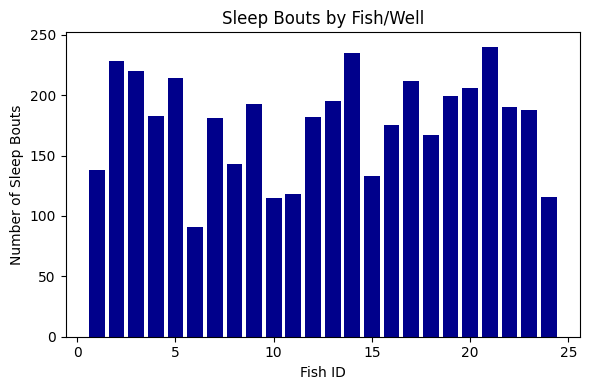

In [693]:
sleep_bout_counts = []

for animalIdx in range(num_animals):
    sleep_bouts_count = 0
    is_sleep_bout = False
    
    for binIdx in range(len(vpSleepBout)):
        if vpSleepBout[binIdx, 3, animalIdx] == 1:
            if is_sleep_bout == False:
                sleep_bouts_count += 1
                is_sleep_bout = True
        else:
            is_sleep_bout = False
    
    sleep_bout_counts.append({
        'Fish ID': animalIdx + 1,
        'Sleep Bouts': sleep_bouts_count
    })

sleep_bouts_df = pd.DataFrame(sleep_bout_counts)

plt.figure(figsize=(6, 4))
plt.bar(sleep_bouts_df['Fish ID'], sleep_bouts_df['Sleep Bouts'], color='darkblue')

plt.xlabel('Fish ID')
plt.ylabel('Number of Sleep Bouts')
plt.title('Sleep Bouts by Fish/Well')

plt.tight_layout()
plt.show()

In [ ]:
selected_animal_idx = 0 

if sleepwakeMatrixBool:
    plt.figure(figsize=(15, 5))
    plt.plot(vpSleepBout[:, 0, selected_animal_idx], vpSleepBout[:, 3, selected_animal_idx], color='darkblue', linewidth=0.2)

    plt.plot(vpMeasure[:, 0, i], vpMeasure[:, 2, i]/10, color='red', label='Abs Sleep (min/10min)')
    
    plt.grid(False)
    plt.ylabel('Abs Sleep (sleep/min)', fontsize=14)
    plt.yticks([0, 1])
    plt.xticks([])
    plt.xlabel(f'Well {selected_animal_idx + 1}', fontsize=14)

    plt.annotate('', xy=(300, 1), xytext=(300, 1.05),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=3, headwidth=12))
    plt.annotate('', xy=(900, 1), xytext=(900, 1.05),
                 arrowprops=dict(facecolor='white', edgecolor='black', shrink=0.05, width=3, headwidth=12))
    
    plt.title(f'Sleep Plot for Fish ID {selected_animal_idx + 1}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(os.path.join(output_dir, f'sleep_plot_animal_{selected_animal_idx + 1}.png'))
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

selected_animal_idx = 0 # Change this index to select a different animal

if sleepwakeMatrixBool:
    plt.figure(figsize=(15, 5))
    
    plt.bar(np.arange(len(vpSleepBout[:, 0, selected_animal_idx])), 
            vpSleepBout[:, 3, selected_animal_idx], 
            color='darkblue', edgecolor='darkblue')
    
    plt.plot(vpMeasure[:, 0, selected_animal_idx], 
             vpMeasure[:, 2, selected_animal_idx] / 10, 
             color='red', label='Abs Sleep (min/10min)', linewidth=1)

    plt.grid(False)
    plt.ylabel('Abs Sleep (sleep/min)', fontsize=14)
    plt.yticks([0, 1])
    plt.xticks([])
    plt.xlabel(f'Well {selected_animal_idx + 1}', fontsize=14)

    plt.annotate('', xy=(300, 1), xytext=(300, 1.05),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=3, headwidth=12))
    plt.annotate('', xy=(900, 1), xytext=(900, 1.05),
                 arrowprops=dict(facecolor='white', edgecolor='black', shrink=0.05, width=3, headwidth=12))
    
    plt.title(f'Sleep Plot for Fish ID {selected_animal_idx + 1}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.legend()
    plt.savefig(os.path.join(output_dir, f'sleep_plot_animal_{selected_animal_idx + 1}.png'))
    plt.show()
